# Test Gillespie 

* `gillespie_sim`

* `gillespie_sim_complete`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [7]:
import sys
sys.path.append("../src/")
from Hypergraphs import CompleteHypergraph
from simulate_gillespie import gillespie_sim, gillespie_sim_complete, get_average

In [24]:
## --- Setup --- ##
N = 1000
g = CompleteHypergraph(N)

I0 = 5

nsims = 50
time_max = 10

# selected betas for 3 regimes: .25N, .5N, .75N
betas_unscaled_selected = [(1.778, 2.552), (2.556, 8.241), (5.667, 13.414)]
betas_unscaled = betas_unscaled_selected[2] # TODO: select regime, e.g.: 2 for .75N

beta1 = betas_unscaled[0] / N       # pairwise infection rate
beta2 = betas_unscaled[1] / (N**2)  # hyperedge contagion rate
mu    = 1  # recovery rate

print(f"\t H = Complete Hypergraph, N = {N}, I0 = {I0}, time_max = {time_max},")
print(f"\t beta1 * N = {beta1 * N}, beta2 * N^2 = {beta2 * (N**2)}, mu = {mu},")
print(f"\t with estimation based on {nsims} Gillespie simulation runs\n")

	 H = Complete Hypergraph, N = 1000, I0 = 5, time_max = 10,
	 beta1 * N = 5.667, beta2 * N^2 = 13.414, mu = 1,
	 with estimation based on 50 Gillespie simulation runs



In [25]:
X_t = gillespie_sim_complete(N, beta1, beta2, mu, I0, time_max)

break: time >= time_max


## Run multiple Gillespie simulations

break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= time_max
break: time >= t

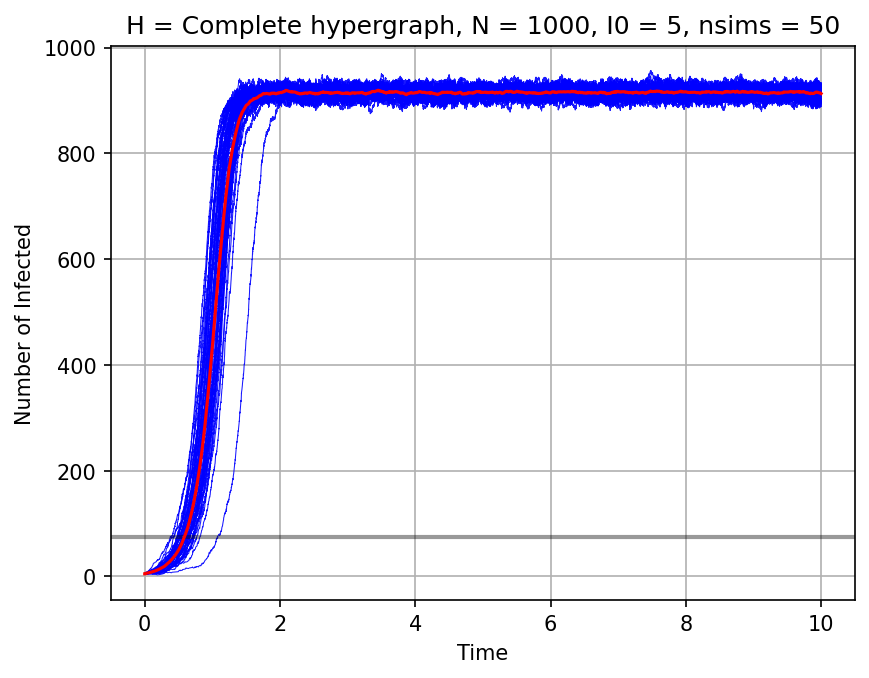

In [26]:
## --- Run Gillespie ---
test_name = "gillespie_complete"
run_gillespie_simulations = True
# run_gillespie_simulations = False

# I0_gillespie # TODO: go over the range when necessary
initial_infections = list(range(I0))

if run_gillespie_simulations: 
    X_sims = []
    for _ in range(nsims):
        # X_t = gillespie_sim(g, beta1, beta2, mu, initial_infections, time_max)
        X_t = gillespie_sim_complete(N, beta1, beta2, mu, I0, time_max)
        X_sims.append(X_t)

    # save the simulation results
    sim_results = {f'sim_{i}': X_sims[i] for i in range(nsims)}
    np.savez_compressed(f'../results/gillespie-sims_{test_name}.npz', **sim_results)
else: 
    # load simulation results
    sim_results = np.load(f'../results/gillespie-sims_{test_name}.npz', allow_pickle=True)
    X_sims = [sim_results[f'sim_{i}'] for i in range(nsims)]

# plot X_t curves in gray and average curve in red
fig = plt.figure(dpi=150) # set DPI
ax  = plt.subplot()

for X_t in X_sims:
    ax.plot(X_t[0], X_t[2], c="blue", alpha=0.9, linewidth=0.5, rasterized=True)

avg_curve, times = get_average(X_sims, time_max, nsims, delta_t = 0.01)

plt.axhline(y=75, color='black', lw=2, alpha=0.4, linestyle='-')

plt.plot(times, avg_curve, "red")

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)
plt.title(f"H = Complete hypergraph, N = {N}, I0 = {I0}, nsims = {nsims}")
plt.savefig(f"../figures/estimation/complete/{test_name}/gillespie-sims.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig) # free up memory

In [27]:
# Single X_t has:
# [time, time_to_event, total_infected, event_type, total_pw, total_ho]
nsim = 0
X_t = X_sims[nsim]
times, waiting_times, total_infected, event_types, total_pw, total_ho = \
    X_t[0], X_t[1], X_t[2], X_t[3], X_t[4], X_t[5]

df = pd.DataFrame({ 
        "time": times,
        "waiting_time": waiting_times,
        "total_infected": total_infected,
        "event_type": event_types,
        "total_pw": total_pw,
        "total_ho": total_ho,
})
df.head()

,time,waiting_time,total_infected,event_type,total_pw,total_ho
0,0.0,None,5,None,4975,9950.0
1,0.012968,0.012968,4,RC,3984,5976.0
2,0.05979,0.046822,5,PW,4975,9950.0
3,0.062029,0.002239,6,PW,5964,14910.0
4,0.06428,0.002252,7,PW,6951,20853.0


In [28]:
# Single X_t has:
# [time, time_to_event, total_infected, event_type, total_pw, total_ho]
nsim = 1
X_t = X_sims[nsim]
times, waiting_times, total_infected, event_types, total_pw, total_ho = \
    X_t[0], X_t[1], X_t[2], X_t[3], X_t[4], X_t[5]

df = pd.DataFrame({ 
        "time": times,
        "waiting_time": waiting_times,
        "total_infected": total_infected,
        "event_type": event_types,
        "total_pw": total_pw,
        "total_ho": total_ho,
})
df.head()

,time,waiting_time,total_infected,event_type,total_pw,total_ho
0,0.0,None,5,None,4975,9950.0
1,0.023637,0.023637,6,PW,5964,14910.0
2,0.036549,0.012912,7,PW,6951,20853.0
3,0.043312,0.006763,8,PW,7936,27776.0
4,0.044123,0.000811,9,PW,8919,35676.0


In [29]:
df.tail()

,time,waiting_time,total_infected,event_type,total_pw,total_ho
17809,9.997125,0.000613,932,PW,63376,29501528.0
17810,9.997466,0.000341,931,RC,64239,29871135.0
17811,9.997613,0.000146,930,RC,65100,30238950.0
17812,9.999465,0.001853,929,RC,65959,30604976.0
17813,10,None,929,None,None,None


## For estimates

In [30]:
# sim_idx, X_t in enumerate(X_sims)
sim_idx = 1
X_t = X_sims[sim_idx]
X_t.shape[1]

17814

In [31]:
times = X_t[0, :]
# durations = X_t[1, :] # TODO: should be the same as diff(times)
# durations = np.diff(times)
durations = X_t[1, 1:-1]

# states should be integers and will be used as indices
states_during_interval = X_t[2, :-2].astype(int)
events_ending_interval = X_t[3, 1:-1]

In [32]:
states_during_interval

array([  5,   6,   7, ..., 932, 931, 930], shape=(17812,))

In [33]:
events_ending_interval

array(['PW', 'PW', 'PW', ..., 'RC', 'RC', 'RC'],
      shape=(17812,), dtype=object)